# Optical character recognition (OCR)

In [65]:
#!pip install easyocr

In [66]:
import cv2
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import imutils
import easyocr

import os 
os.chdir(r"C:\Users\amb\Downloads")

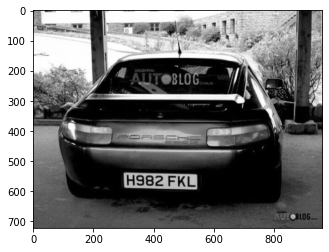

In [67]:
img = cv2.imread("image4.jpg")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))


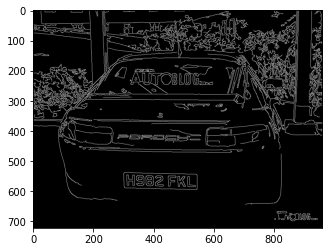

In [68]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [69]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contourss = imutils.grab_contours(keypoints)
contours = sorted(contourss, key=cv2.contourArea, reverse=True)[:10]
#print(contours)
len(contours)

10

In [70]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break
len(location)        

4

In [71]:
location


array([[[300, 540]],

       [[306, 589]],

       [[543, 592]],

       [[538, 543]]], dtype=int32)

In [72]:
approx[1][0][0]

306

In [73]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], -1,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

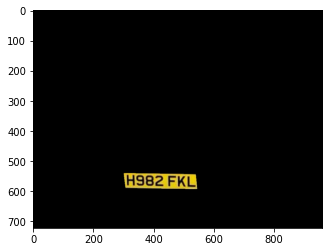

In [74]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))


In [75]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

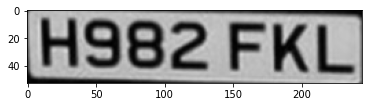

In [76]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))


In [77]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[0, 0], [244, 0], [244, 53], [0, 53]], 'H982 FKL', 0.9769778047590311)]

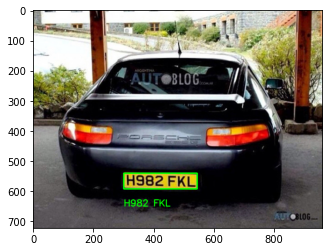

In [78]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

In [1]:
!pip install pytesseract 

  Created wheel for pytesseract: filename=pytesseract-0.3.7-py2.py3-none-any.whl size=13948 sha256=8eb695bbc9d40e4558daa2229a2a2f0eaa6e109bc30e86bc1a6623012621159d
  Stored in directory: c:\users\amb\appdata\local\pip\cache\wheels\ac\5b\f4\d5bcc930771126a32285e058c576eda84e43691453a9f7ad71
Successfully built pytesseract
